<div class="alert alert-block alert-danger">
<b>UWAGI PROWADZĄCEGO</b> Jaki krok wybrać - dużo losowych eksperymentów - po ilu iteracjach będziemy kończyć z danym krokiem - dla mnóstwa różnych kroków; minimum, maksimum, mediany; boxplot (kwantyle) - jak się rozkłada tempo zbiegu jako można zagregować wyniki eksperymentów losowych
</div>

Poniżej umieszczone zostały niezbędne importy funkcji z bibliotek, które zostały wykorzystane do realizacji zadania.

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# import random - nie wiem, czy się jeszcze przyda

Dla wykresu 3D będziemy również potrzebowali zaimportowania ...

In [79]:
from mpl_toolkits import mplot3d

Definiujemy funkcję f(x) (zgodnie z treścią zawartą w zadaniu) - o nazwie *f_function*. Argumentem na wejście funkcji *f_function* jest dana zmienna niezależna (oznaczona jako *indepedent_variable*) - wartość współrzędnej x (później w kodzie będzie ona oznaczona jako m.in. *x_value*), zaś na wyjściu otrzymuje obliczoną zgodnie z formułą funkcji wartość zmiennej niezależnej - *dependent_variable*.

In [80]:
def f_function(independent_variable):
       dependent_variable = 10*(independent_variable**4) + 3*(independent_variable**3) - 30*(independent_variable**2) + 10*independent_variable
       return dependent_variable

In [81]:
x_values = np.linspace(-3, 2.2)
y_values = [f_function(x) for x in  x_values]

W tej komórce kodu jesteśmy w stanie ustawić rozmiary wykresu, w celu jak najlepszego zwizualizowania danych

In [ ]:
# plt.rcParams["figure.figsize"] = (40,20)

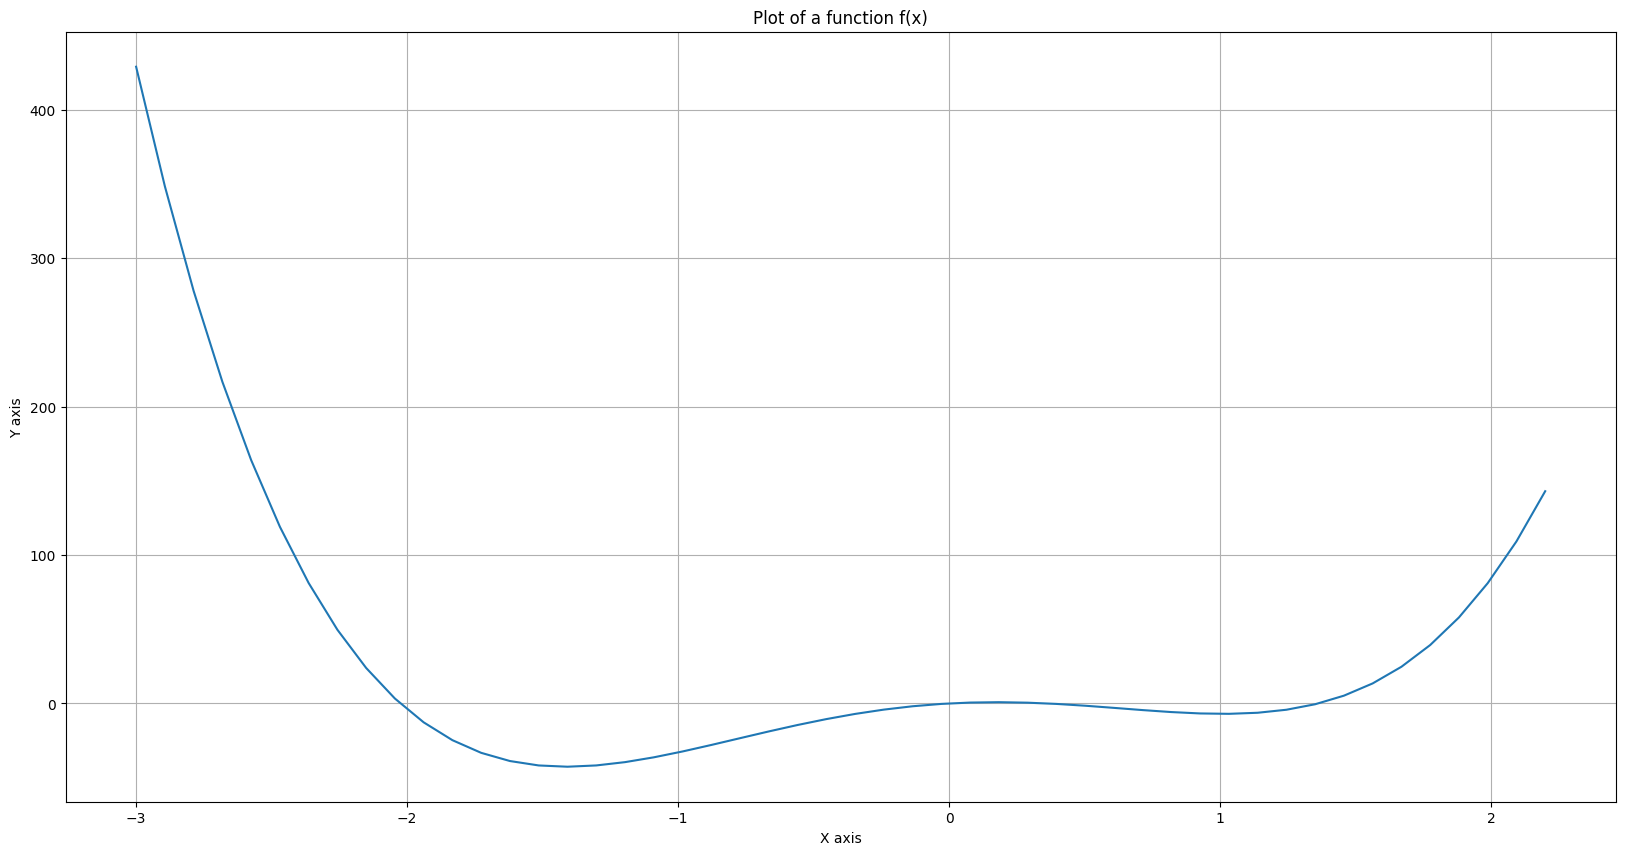

In [82]:
fig, ax = plt.subplots()

ax.plot(x_values, y_values)

ax.set(xlabel='X axis', ylabel='Y axis',
       title='Plot of a function f(x)')
ax.grid()


plt.show()

In [83]:
def g_function(first_independent_variable, second_independent_variable):
    dependent_variable = 10*second_independent_variable**4 + 10*first_independent_variable**4 + 3*first_independent_variable**3 - 30*first_independent_variable**2 + 10*first_independent_variable
    return dependent_variable

In [84]:
plt.rcParams["figure.figsize"] = (20,10)

In [85]:
x_values = np.linspace(-2.2, 2.2)
y_values = np.linspace(-2.2, 2.2)
vector_x_value, vector_y_value = np.meshgrid(x_values, y_values)
z_values = g_function(vector_x_value, vector_y_value)


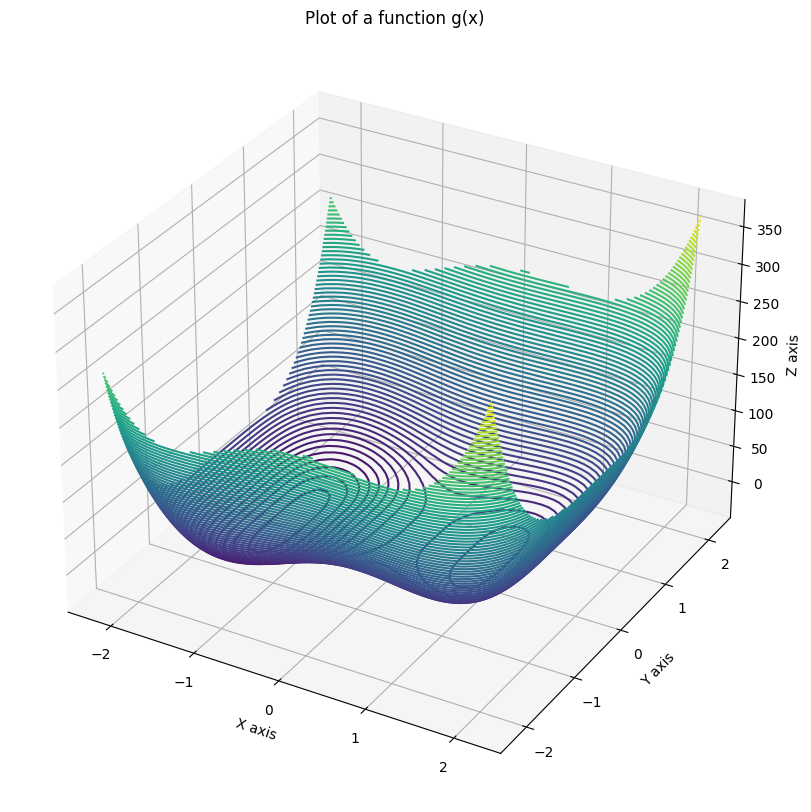

In [86]:

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(x_values, y_values, z_values, 100, cmap='viridis')
ax.set(xlabel='X axis', ylabel='Y axis', zlabel='Z axis',
       title='Plot of a function g(x)')

# ax.view_init(60, 35)

plt.show()

In [67]:
ax.view_init(60, 35)

plt.show()

Warunki stopu w zaimplementowanym algorytmie to liczba iteracji (nie może zostać przekroczona podana liczba iteracji funkcji - wówczas funkcja kończy się - nie mamy jednak pewności, czy na wyjściu otrzymany punkt wykresu jest minimum lokalnym/globalnym ) oraz precyzja (algorytm pomyślnie zatrzymuje się, gdy różnica między badanym wcześniej a aktualnym punktem wykresu jest mniejsza, niż precyzja - oznacza to, że znaleźliśmy się w minimum lokalnym/globalnym).

In [97]:
stop_precision_criteria = 10**(-7)
stop_iteration_criteria = 1000000
"""
na dole są podane reasonable wartości bety
"""
values_of_beta = [0.3, 0.1, 0.03, 0.01, 0.003, 0.001]

Zdefiniowana funkcja obliczająca gradient funkcji jednej zmiennej f (formuła zgodna z treścią zadania).

In [43]:
def calculate_f_function_gradient(x_coordinate):
    return 40*x_coordinate**3 + 9*x_coordinate**2 - 60*x_coordinate + 10

Zdefiniowana funkcja obliczająca gradient funkcji dwóch zmiennych g (formuła zgodna z treścią zadania).

In [44]:
def calculate_g_function_gradient(x_coordinate, y_coordinate):
    return [40*x_coordinate**3 + 9*x_coordinate**2 - 60*x_coordinate + 10, 40*y_coordinate**3]

In [98]:
def gradient_descent_2d(step_size, starting_point_x, beta):
    iteration_counter = 0
    x_coordinates_analysed_points = [starting_point_x]
    while step_size > stop_precision_criteria and iteration_counter < stop_iteration_criteria:
        previous_x = starting_point_x
        starting_point_x = round(starting_point_x - beta * calculate_f_function_gradient(previous_x), 10)
        step_size = abs(starting_point_x - previous_x)
        iteration_counter += 1
        x_coordinates_analysed_points.append(starting_point_x)
    if iteration_counter >= stop_iteration_criteria:
        return x_coordinates_analysed_points, None
    else:
        return x_coordinates_analysed_points, starting_point_x
    #     print(starting_point_x, ", ", iteration_counter)
    # print("The global minimum occurs at, ", starting_point_x)

In [ ]:
def gradient_descent_3d(step_size, starting_point_x, starting_point_y, beta):
    iteration_counter = 0
    x_coordinates_analysed_points = [starting_point_x]
    y_coordinates_analysed_points = [starting_point_y]
    while step_size > stop_precision_criteria and iteration_counter < stop_iteration_criteria:
        previous_x = starting_point_x
        previous_y = starting_point_y
        starting_point_x = starting_point_x - beta * calculate_g_function_gradient(previous_x, previous_y)[0]
        starting_point_y = starting_point_y - beta * calculate_g_function_gradient(previous_x, previous_y)[1]
        step_size = max(abs(starting_point_x - previous_x), abs(starting_point_y - previous_y))
        iteration_counter +=1
        x_coordinates_analysed_points.append(starting_point_x)
        y_coordinates_analysed_points.append(starting_point_y)
        print(starting_point_x, starting_point_y)
    if iteration_counter >= stop_iteration_criteria:
        return x_coordinates_analysed_points, None
    else:
        return x_coordinates_analysed_points, (starting_point_x, starting_point_y)
    # print("The global minimum occurs at, (",starting_point_x,", ", starting_point_y,").")
    # funkcja gradient będzie zwracać listę punktów - nie moze printować
    # funkcja informująca o wyniku
    

In [99]:


# ax2 = ax1.twinx()

analysed_graph_points_2d, local_minimum_2d = gradient_descent_2d(1, -3, 0.001)
analysed_graph_points_3d, local_minimum_3d = gradient_descent_3d(1, -2, -2, 0.001)
pass

-1.846 -1.68
-1.7458036945600002 -1.49033472
-1.675145838412298 -1.3579275665415587
-1.6228836315139643 -1.2577686067077614
-1.5829895371728724 -1.178177921508724
-1.5518518670176478 -1.1127606190938881
-1.5271476456074518 -1.057646200078501
-1.5073028000672852 -1.010322223415572
-1.4912072524943907 -0.9690707268175417
-1.4780531320575694 -0.932668628709063
-1.4672374670154364 -0.9002165815441755
-1.4583008686321395 -0.8710355247516582
-1.4508873721575084 -0.8446012381157766
-1.4447172609511387 -0.8205013441091193
-1.4395681533683888 -0.7984061469181641
-1.4352615158227495 -0.778048311121514
-1.4316528381733549 -0.7592083637897455
-1.4286243414813244 -0.7417041365446595
-1.4260794750064958 -0.7253829362436538
-1.4239387021451404 -0.7101156447801447
-1.4221362313172623 -0.6957922080566018
-1.420617450713089 -0.682318141939823
-1.4193368949395355 -0.6696117938809629
-1.4182566189185726 -0.6576021736539225
-1.4173448873231644 -0.6462272180181057
-1.4165751111262197 -0.6354323899696985
-1.

In [ ]:
analysed_graph_points, local_minimum = gradient_descent_3d(1, -3, 0.001)